In [40]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import json
import numpy as np
import torch

DATASET='ImageNet10'
captions_path = os.path.join('gen_captions', f'{DATASET}_captions.tsv')
df = pd.read_csv(captions_path, sep='\t', )
print(df.head())

    n02123597_8723    a white cat is sleeping on a person's lap.  n02123597
0   n02123597_5224          a small cat looking out of a window.  n02123597
1   n02123597_6464                 a cat laying on a blue chair.  n02123597
2   n02123597_9585               a man holding a cat in a chair.  n02123597
3  n02123597_11923  a couple of cats sitting next to each other.  n02123597
4    n02123597_396               a cat laying on top of a chair.  n02123597


In [28]:
labels = df.iloc[:,2].unique()
print(labels)

['n02123597' 'n04552348' 'n01641577' 'n01728572' 'n02422699' 'n01530575'
 'n03417042' 'n02107574' 'n03095699' 'n04285008']


In [45]:
act = np.concatenate(torch.load('img_templates/MIPCI_activations_ImageNet10.pt'))
indx = []
d = []
j = 0
while len(d) < 10:
    i = np.random.randint(0, len(df))
    label = df.iloc[i][2]
    if (label not in d):
        d.append(label)
        indx.append(i)

m = act[indx]
print(m.shape)

fig = plt.figure(figsize=[10, 10])
im = ax.imshow(m)
fig.tight_layout()
plt.show()

(10, 10)


<Figure size 720x720 with 0 Axes>

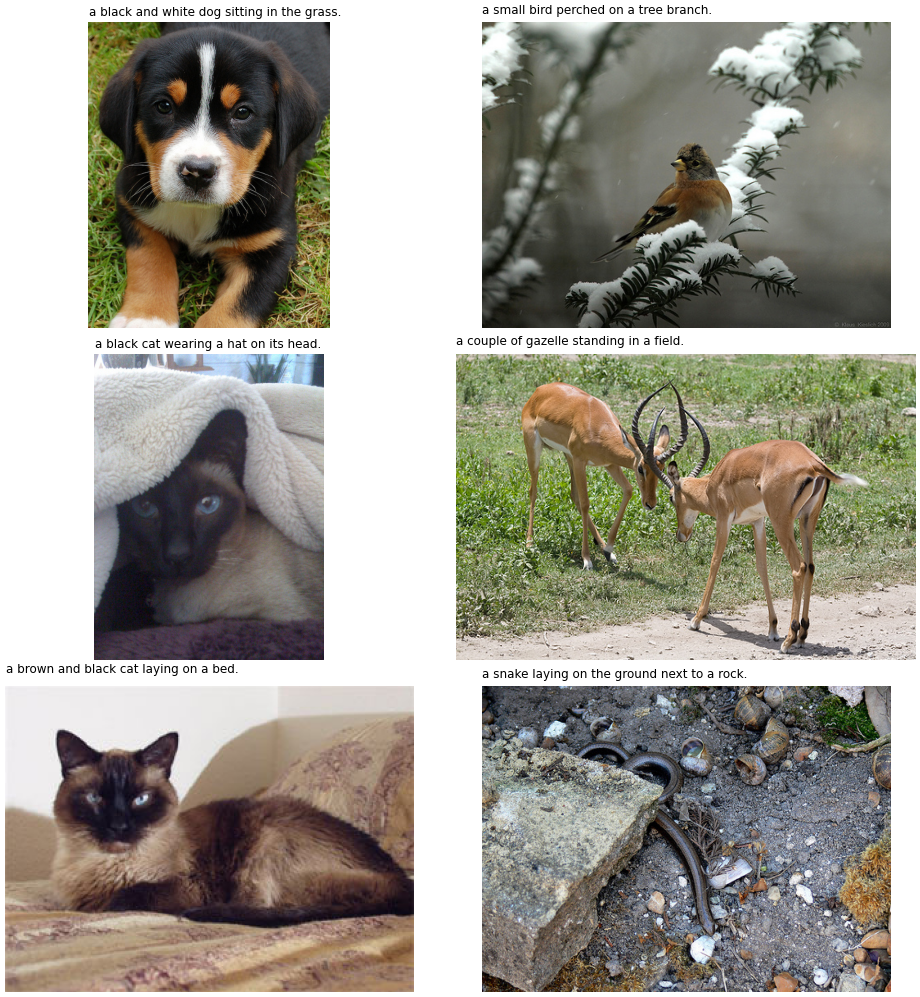

In [31]:
fig = plt.figure(dpi = 50, figsize=[20,20])

N = 6
DATASET=''
data_path = os.path.join(f'/nobackup-slow/dataset/ILSVRC-2012/val')
to_np = lambda x: x.data.cpu().numpy()
with torch.no_grad():
    for c, i in enumerate(np.random.randint(0, len(df), size=N)):
        test_image = str(df.iloc[i][0])+'.JPEG'
        test_class = str(df.iloc[i][2])
        if DATASET in ['iNaturalist', 'Places', 'SUN']: test_class = 'images'
        test_caption = df.iloc[i][1]

        img = Image.open(os.path.join(data_path, test_class, test_image))

        ax = fig.add_subplot(int(N/2), 2, c + 1)
        ax.imshow(img)
        ax.axis('off')
        txt = ax.text(0, -10, test_caption, wrap=True, fontsize='xx-large')
        txt._get_wrap_line_width = lambda : 800
plt.tight_layout()